In [155]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df =  pd.read_csv('C:/Users/Michael/Downloads/python practice/titanic/train.csv')

### Exploratory Analysis

In [86]:
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
### Fare and PClass has correlation with Survived 

### Fare and PClass has correlation with Survived 
df.corr().Survived.sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [88]:
# Imputing Embarked would be very easy. Let's just do median or mean 
# imputing Cabin would be very hard. Dropping the column as a whole should be considered
# Age would be difficult. Let's look at the data first 

df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na ==0].index).sort_values(ascending=False)
df_na

Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64

In [89]:
# Ticket and Cabin might be unnecessary data
# df.Ticket.value_counts()
# df.Cabin.value_counts()

df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

C:\Users\Michael\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


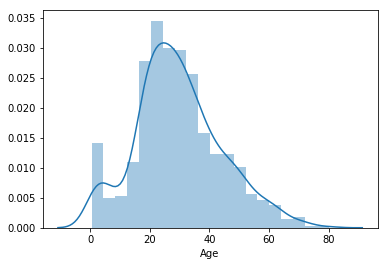

In [90]:
## the Age graph is skewed to the right. Using Median would be a better indicator

Age = df.Age.dropna()
sns.distplot(Age)


24.242424242424242
20.65095398428732
55.106621773288445


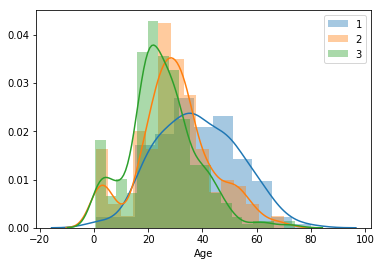

In [91]:
#can I guess a passenger's age by looking at the PClass?

class1 = df[df.Pclass ==1]
class2 = df[df.Pclass ==2]
class3 = df[df.Pclass ==3]
sns.distplot(class1.Age.dropna(), label = "1")
sns.distplot(class2.Age.dropna(), label = "2")
sns.distplot(class3.Age.dropna(), label = "3")
plt.legend()
class1percent = len(class1)/891*100
class2percent = len(class2)/891*100
class3percent = len(class3)/891*100
print(class1percent)
print(class2percent)
print(class3percent)


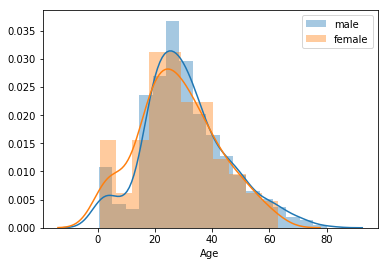

In [92]:
#distribution of male and female is roughly similar
male  = df[df.Sex == 'male']
female = df[df.Sex =='female']
sns.distplot(male.Age.dropna(), label = "male")
sns.distplot(female.Age.dropna(), label = "female")
plt.legend()

In [93]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [94]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [95]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [96]:
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)


In [97]:
## Guess Age by imputing the most frequent value from both Sex and Pclass

guess_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        guess_df = df[(df['Sex'] == i) & (df['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

        age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1),'Age'] = guess_ages[i,j]

df['Age'] = df['Age'].astype(int)

df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S


In [98]:
# Can we do something with Last Name? This might be useful for imputing age

#df.Last.value_counts() 661 rows of data
df['Last'] = df.Name.apply(lambda x: x.split(',')[0])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,Allen


In [84]:
#df[df.Age.isnull()] # 177 rows
#df[(df.Age.isnull())&(df.SibSp != 0)]   # 40 rows
#df[(df.Age.isnull())&(df.SibSp != 0)&(df.Parch ==0)]
#df[(df.Age.isnull())&(df.SibSp ==0)] # 137
#df[(df.Age.isnull())&(df.SibSp ==0)&(df.Parch ==0)] # 133 rows - There is no way to guess their age. 

# LastAge = df.groupby("Last")["Age"]
# LastAge.describe()

In [156]:
y = df['Survived']


In [157]:
df =df.drop(columns=['Survived'])


In [158]:
y.shape

(891,)

In [21]:
test = pd.read_csv('C:/Users/Michael/Downloads/python practice/titanic/test.csv')

In [22]:
print(test.shape)
test_na = (test.isnull().sum() / len(test)) * 100
test_na = test_na.drop(test_na[test_na ==0].index).sort_values(ascending=False)
test_na

(418, 11)


Cabin    78.229665
Age      20.574163
Fare      0.239234
dtype: float64

### Null values in Age would be imputed with the median value from each PClass & Sex

In [309]:
test = pd.read_csv('C:/Users/Michael/Downloads/python practice/titanic/test.csv')
train = pd.read_csv('C:/Users/Michael/Downloads/python practice/titanic/train.csv')
ntrain = train.shape[0]
ntest = test.shape[0]

In [310]:
print(test.shape)
print(train.shape)


all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.shape
train.head()


(418, 11)
(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [311]:
df_na = (all_data.isnull().sum() / len(all_data)) * 100
df_na = df_na.drop(df_na[df_na ==0].index).sort_values(ascending=False)
df_na


Cabin       77.463713
Survived    31.932773
Age         20.091673
Embarked     0.152788
Fare         0.076394
dtype: float64

In [312]:
#I imputed the most frequent age by (pclass and sex)

all_data["Embarked"] = all_data['Embarked'].fillna(all_data["Embarked"].mode()[0])
all_data["Fare"] = all_data['Fare'].fillna(all_data["Fare"].mode()[0])
all_data['Sex'] = all_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)


for i in range(0, 2):
    for j in range(0, 3):
        guess_df = all_data[(all_data['Sex'] == i) & (all_data['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

        age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
for i in range(0, 2):
    for j in range(0, 3):
        all_data.loc[ (all_data.Age.isnull()) & (all_data.Sex == i) & (all_data.Pclass == j+1),'Age'] = guess_ages[i,j]

all_data['Age'] = all_data['Age'].astype(int)

all_data.head()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171
1,38,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599
2,26,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282
3,35,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803
4,35,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450


In [313]:
all_data['family'] = all_data['SibSp'] + all_data['Parch']
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,family
0,22,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,1
1,38,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,1
2,26,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,0
3,35,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,1
4,35,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,0


In [314]:
df_na = (all_data.isnull().sum() / len(all_data)) * 100
df_na = df_na.drop(df_na[df_na ==0].index).sort_values(ascending=False)
df_na

Cabin       77.463713
Survived    31.932773
dtype: float64

In [315]:
all_data.drop(columns = ['Cabin','Name','PassengerId','Ticket'], inplace = True)
all_data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,family
0,22,S,7.2500,0,3,0,1,0.0,1
1,38,C,71.2833,0,1,1,1,1.0,1
2,26,S,7.9250,0,3,1,0,1.0,0
3,35,S,53.1000,0,1,1,1,1.0,1
4,35,S,8.0500,0,3,0,0,0.0,0


In [316]:
all_data['Ageband'] = pd.cut(all_data['Age'],8)
all_data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,family,Ageband
0,22,S,7.2500,0,3,0,1,0.0,1,"(20.0, 30.0]"
1,38,C,71.2833,0,1,1,1,1.0,1,"(30.0, 40.0]"
2,26,S,7.9250,0,3,1,0,1.0,0,"(20.0, 30.0]"
3,35,S,53.1000,0,1,1,1,1.0,1,"(30.0, 40.0]"
4,35,S,8.0500,0,3,0,0,0.0,0,"(30.0, 40.0]"


In [317]:
# all_data.loc[all_data['Age']<=10, 'Agelev'] = 0
# all_data.loc[(all_data['Age']>10)&(all_data['Age']<=20), 'Agelev'] = 1
# all_data.loc[(all_data['Age']>20)&(all_data['Age']<=30), 'Agelev'] = 2
# all_data.loc[(all_data['Age']>30)&(all_data['Age']<=40), 'Agelev'] = 3
# all_data.loc[(all_data['Age']>40)&(all_data['Age']<=50), 'Agelev'] = 4
# all_data.loc[(all_data['Age']>50)&(all_data['Age']<=60), 'Agelev'] = 5
# all_data.loc[(all_data['Age']>60)&(all_data['Age']<=70), 'Agelev'] = 6
# all_data.loc[(all_data['Age']>70)&(all_data['Age']<=80), 'Agelev'] = 7
# all_data.loc[all_data['Age']>80, 'Agelev'] = 8
# all_data.head()

In [319]:
# all_data['Embarked'] = all_data['Embarked'].map( {'S':2,'C': 1, 'Q': 0} ).astype(int)
#y.describe


In [320]:
all_data['FareBand'] = pd.qcut(all_data['Fare'], 4)
# all_data.loc[all_data['Fare'] <= 7.91, 'Fare'] = 0
# all_data.loc[(all_data['Fare'] > 7.91) & (all_data['Fare'] <= 14.454), 'Fare'] = 1
# all_data.loc[(all_data['Fare'] > 14.454) & (all_data['Fare'] <= 31), 'Fare']   = 2
# all_data.loc[all_data['Fare'] > 31, 'Fare'] = 3
# all_data['Fare'] = all_data['Fare'].astype(int)

all_data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,family,Ageband,FareBand
0,22,S,7.2500,0,3,0,1,0.0,1,"(20.0, 30.0]","(-0.001, 7.896]"
1,38,C,71.2833,0,1,1,1,1.0,1,"(30.0, 40.0]","(31.275, 512.329]"
2,26,S,7.9250,0,3,1,0,1.0,0,"(20.0, 30.0]","(7.896, 14.454]"
3,35,S,53.1000,0,1,1,1,1.0,1,"(30.0, 40.0]","(31.275, 512.329]"
4,35,S,8.0500,0,3,0,0,0.0,0,"(30.0, 40.0]","(7.896, 14.454]"


In [321]:
label = LabelEncoder()

all_data['Pclass_Code'] = label.fit_transform(all_data['Pclass'])
all_data['Embarked_Code'] = label.fit_transform(all_data['Embarked'])
all_data['AgeBin_Code'] = label.fit_transform(all_data['Ageband'])
all_data['FareBin_Code'] = label.fit_transform(all_data['FareBand'])

# all_data['Pclass'] = all_data['Pclass'].astype(str)
# encode_columns = ['Sex','Pclass']
# categorical = all_data[encode_columns]

# OH = OneHotEncoder(handle_unknown='ignore', sparse=False)
# OH.fit(categorical)
# new_cat = pd.DataFrame(OH.transform(categorical))
# #new_cat.index = categorical.index
# new_cat.head()
all_data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,family,Ageband,FareBand,Pclass_Code,Embarked_Code,AgeBin_Code,FareBin_Code
0,22,S,7.2500,0,3,0,1,0.0,1,"(20.0, 30.0]","(-0.001, 7.896]",2,2,2,0
1,38,C,71.2833,0,1,1,1,1.0,1,"(30.0, 40.0]","(31.275, 512.329]",0,0,3,3
2,26,S,7.9250,0,3,1,0,1.0,0,"(20.0, 30.0]","(7.896, 14.454]",2,2,2,1
3,35,S,53.1000,0,1,1,1,1.0,1,"(30.0, 40.0]","(31.275, 512.329]",0,2,3,3
4,35,S,8.0500,0,3,0,0,0.0,0,"(30.0, 40.0]","(7.896, 14.454]",2,2,3,1


In [375]:
df2 = all_data.drop(['Age','Embarked','Parch','Pclass','SibSp','Ageband','FareBand'], axis=1)
df2.head()

,Fare,Sex,Survived,family,Pclass_Code,Embarked_Code,AgeBin_Code,FareBin_Code
0,7.2500,0,0.0,1,2,2,2,0
1,71.2833,1,1.0,1,0,0,3,3
2,7.9250,1,1.0,0,2,2,2,1
3,53.1000,1,1.0,1,0,2,3,3
4,8.0500,0,0.0,0,2,2,3,1


In [376]:
train1 = df2[:ntrain]
test1 = df2[ntrain:]

print(train1.shape)
print(test1.shape)
target = train1['Survived']
print(target.shape)

(891, 8)
(418, 8)
(891,)


In [377]:
fun = pd.concat([train,y], axis=1)

fun.corr().Survived.sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [378]:
train1 = train1.drop(['Survived'], axis=1)

train_x,test_x,train_y,test_y = train_test_split(train1,target)


In [379]:

print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)
print(train1.shape, target.shape)
target.tail()

(668, 7) (223, 7) (668,) (223,)
(891, 7) (891,)


886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, dtype: float64

In [382]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = target

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, train_x, train_y, cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(train_x, train_y)
    MLA_predict[MLA_name] = alg.predict(train_x)
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.91525,0.829851,0.0393758,0.0487648
21,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.9475,0.813433,0.0496142,0.0396359
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.945,0.804478,0.0664305,0.00840666
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.9465,0.802488,0.0427658,0.0103108
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': 'warn',...",0.79825,0.799005,0.0482254,0.157944
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.958,0.798507,0.0688026,0.00880699
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.79225,0.79801,0.0468191,0.00460312
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.84125,0.797015,0.0830473,0.0422403
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.79125,0.795522,0.0483407,0.00258725
17,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.958,0.78607,0.0462446,0.00182331


In [395]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)


In [384]:
print(train_x.shape, train_y.shape)

(668, 7) (668,)


In [408]:
vote_est = [
    #Ensemble Methods: http://scikit-learn.org/stable/modules/ensemble.html
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    #Gaussian Processes: http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    #GLM: http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    ('lr', linear_model.LogisticRegressionCV()),
    
    #Navies Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    
    #Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    ('knn', neighbors.KNeighborsClassifier()),
    
    #SVM: http://scikit-learn.org/stable/modules/svm.html
    ('svc', svm.SVC(probability=True)),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
   ('xgb', XGBClassifier())

]


#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, train_x, train_y, cv  = cv_split)
vote_hard.fit(train_x, train_y)

print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)


#Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, train_x, train_y, cv  = cv_split)
vote_soft.fit( train_x, train_y)

print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)




Hard Voting Training w/bin score mean: 92.33
Hard Voting Test w/bin score mean: 83.03
Hard Voting Test w/bin score 3*std: +/- 5.68
----------
Soft Voting Training w/bin score mean: 93.45
Soft Voting Test w/bin score mean: 83.28
Soft Voting Test w/bin score 3*std: +/- 4.02
----------


In [392]:
test1.drop(['Survived'], axis=1, inplace=True)


In [409]:
predicted_soft =vote_soft.predict(test1)
predicted_hard = vote_hard.predict(test1)
softvote = pd.DataFrame({'PassengerId' : PassengerId, 'Survived':predicted_soft })
hardvote = pd.DataFrame({'PassengerId' : PassengerId, 'Survived':predicted_hard })
# softvote.head()
softvote.to_csv('softvote_prediciton.csv',index=False)
hardvote.to_csv('hardvote_prediciton.csv',index=False)

In [303]:
k = ensemble.GradientBoostingClassifier()
k.fit(train_x, train_y)



GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [306]:
pred_y = k.predict(test_x)
print(mean_absolute_error(test_y, pred_y))

0.17488789237668162


In [150]:
print(train.shape)
print(y.shape)

(891, 7)
(892,)


In [291]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators = 1800, learning_rate = 0.01, n_jobs = 10)
my_model.fit(train_x, train_y, early_stopping_rounds=10, eval_set=[(test_x,test_y)],verbose=False)
print(my_model.score(train_x,train_y))
#score is 0.66
print(my_model.score(test_x,test_y))
#score is 0.45
pred_y = my_model.predict(test_x)
print(mean_absolute_error(test_y, pred_y))
## the error is about 0.277. I don't think this is good enough


0.7249693091435676
0.3681335037406686
0.27594779852794427


In [80]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=140)
log_model.fit(train_x,train_y)
print(log_model.score(train_x,train_y))
#score is 0.81
print(log_model.score(test_x,test_y))
#score is 0.85
pred_y = log_model.predict(test_x)
print(mean_absolute_error(test_y, pred_y))
## the error is about 0.15. 


0.8203592814371258
0.7443946188340808
0.2556053811659193


C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [81]:
rand_forrest = RandomForestRegressor(n_estimators = 1000)
rand_forrest.fit(train_x,train_y)
print(rand_forrest.score(train_x,train_y))
#score is 0.88
print(rand_forrest.score(test_x,test_y))
#score is 0.36
pred_y = rand_forrest.predict(test_x)
print(mean_absolute_error(test_y, pred_y))
## the error is about 0.252. 

0.7141065184131407
0.24130049985457036
0.26181545949202345


In [82]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(train_x, train_y)
print(neigh.score(train_x,train_y))
#score is 0.64
print(neigh.score(test_x,test_y))
#score is 0.06
pred_y = neigh.predict(test_x)
print(mean_absolute_error(test_y, pred_y))
# 0.309

0.574540292558192
0.020476398601398604
0.3116591928251121


In [208]:
# Let's try submitting this result to Kaggle
test = pd.read_csv('C:/Users/Michael/Downloads/python practice/titanic/test.csv')


In [210]:
test.head()
df_na = (test.isnull().sum() / len(test)) * 100
df_na = df_na.drop(df_na[df_na ==0].index).sort_values(ascending=False)
df_na

Cabin    78.229665
Age      20.574163
Fare      0.239234
dtype: float64

In [211]:
test["Fare"] = all_data['Fare'].fillna(all_data["Fare"].mode()[0])
test["Age"] = all_data.groupby('Pclass')["Age"].transform(lambda x: x.fillna(x.median()))

In [399]:
test.head()
PassengerId = test.PassengerId
test.drop(columns = ['PassengerId','Name','Ticket','Cabin'], inplace= True)

In [220]:
test['Pclass'] = test['Pclass'].astype(str)
encode_columns = ['Embarked','Sex','Pclass']
categorical = test[encode_columns]

new_cat = pd.DataFrame(OH.transform(categorical))
#new_cat.index = categorical.index
new_cat.head()


,0,1,2,3,4,5,6,7
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [222]:
numerical = test.drop(encode_columns, axis=1)
df2 = pd.concat([numerical,new_cat], axis=1)
df2.head()

,Age,SibSp,Parch,Fare,0,1,2,3,4,5,6,7
0,22.0,0,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,1,0,71.2833,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,26.0,0,0,7.9250,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,35.0,0,0,53.1000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,35.0,1,1,8.0500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [223]:
predicted_y = log_model.predict(df2)

In [231]:
log_regress = pd.DataFrame({'PassengerId' : PassengerId, 'Survived':predicted_y })
log_regress.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [233]:
log_regress.to_csv('log_regression_prediciton.csv',index=False)